In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample

In [3]:
data = pd.read_csv('wine_dataset.csv')
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
data.shape

(6497, 13)

Le dataset contient 6497 observations de 13 variables.

In [6]:
data = data.drop(columns=['quality'], axis=1)

/opt/mamba/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/mamba/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


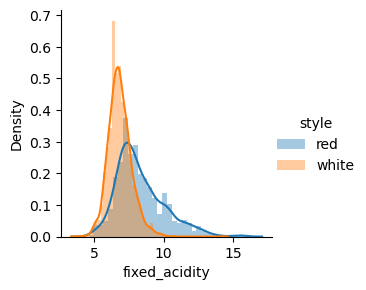

In [9]:
g = sns.FacetGrid(data=data, hue='style')
g.map(sns.distplot, 'fixed_acidity').add_legend()
plt.show()

/opt/mamba/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/mamba/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/mamba/lib/python3.12/site-packa

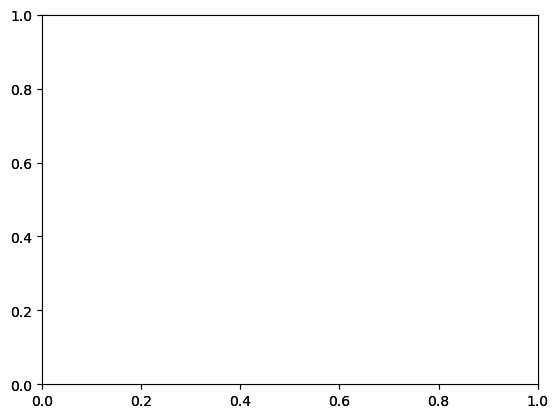

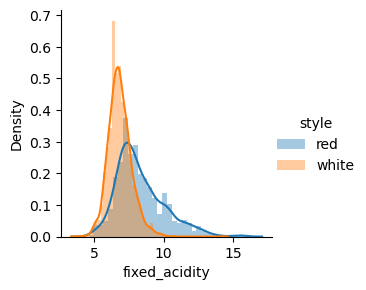

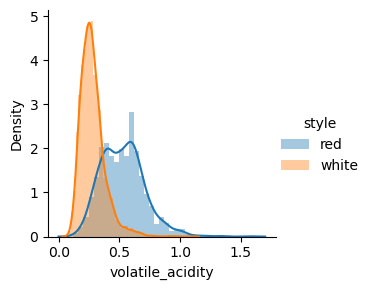

In [10]:
fig = plt.figure()
fig.add_subplot()
g = sns.FacetGrid(data=data, hue='style')
g.map(sns.distplot, 'fixed_acidity').add_legend()
fig.add_subplot()
g = sns.FacetGrid(data=data, hue='style')
g.map(sns.distplot, 'volatile_acidity').add_legend()

In [16]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'style'],
      dtype='object')

In [17]:
for i in data.columns:
    print(i)

fixed_acidity
volatile_acidity
citric_acid
residual_sugar
chlorides
free_sulfur_dioxide
total_sulfur_dioxide
density
pH
sulphates
alcohol
style


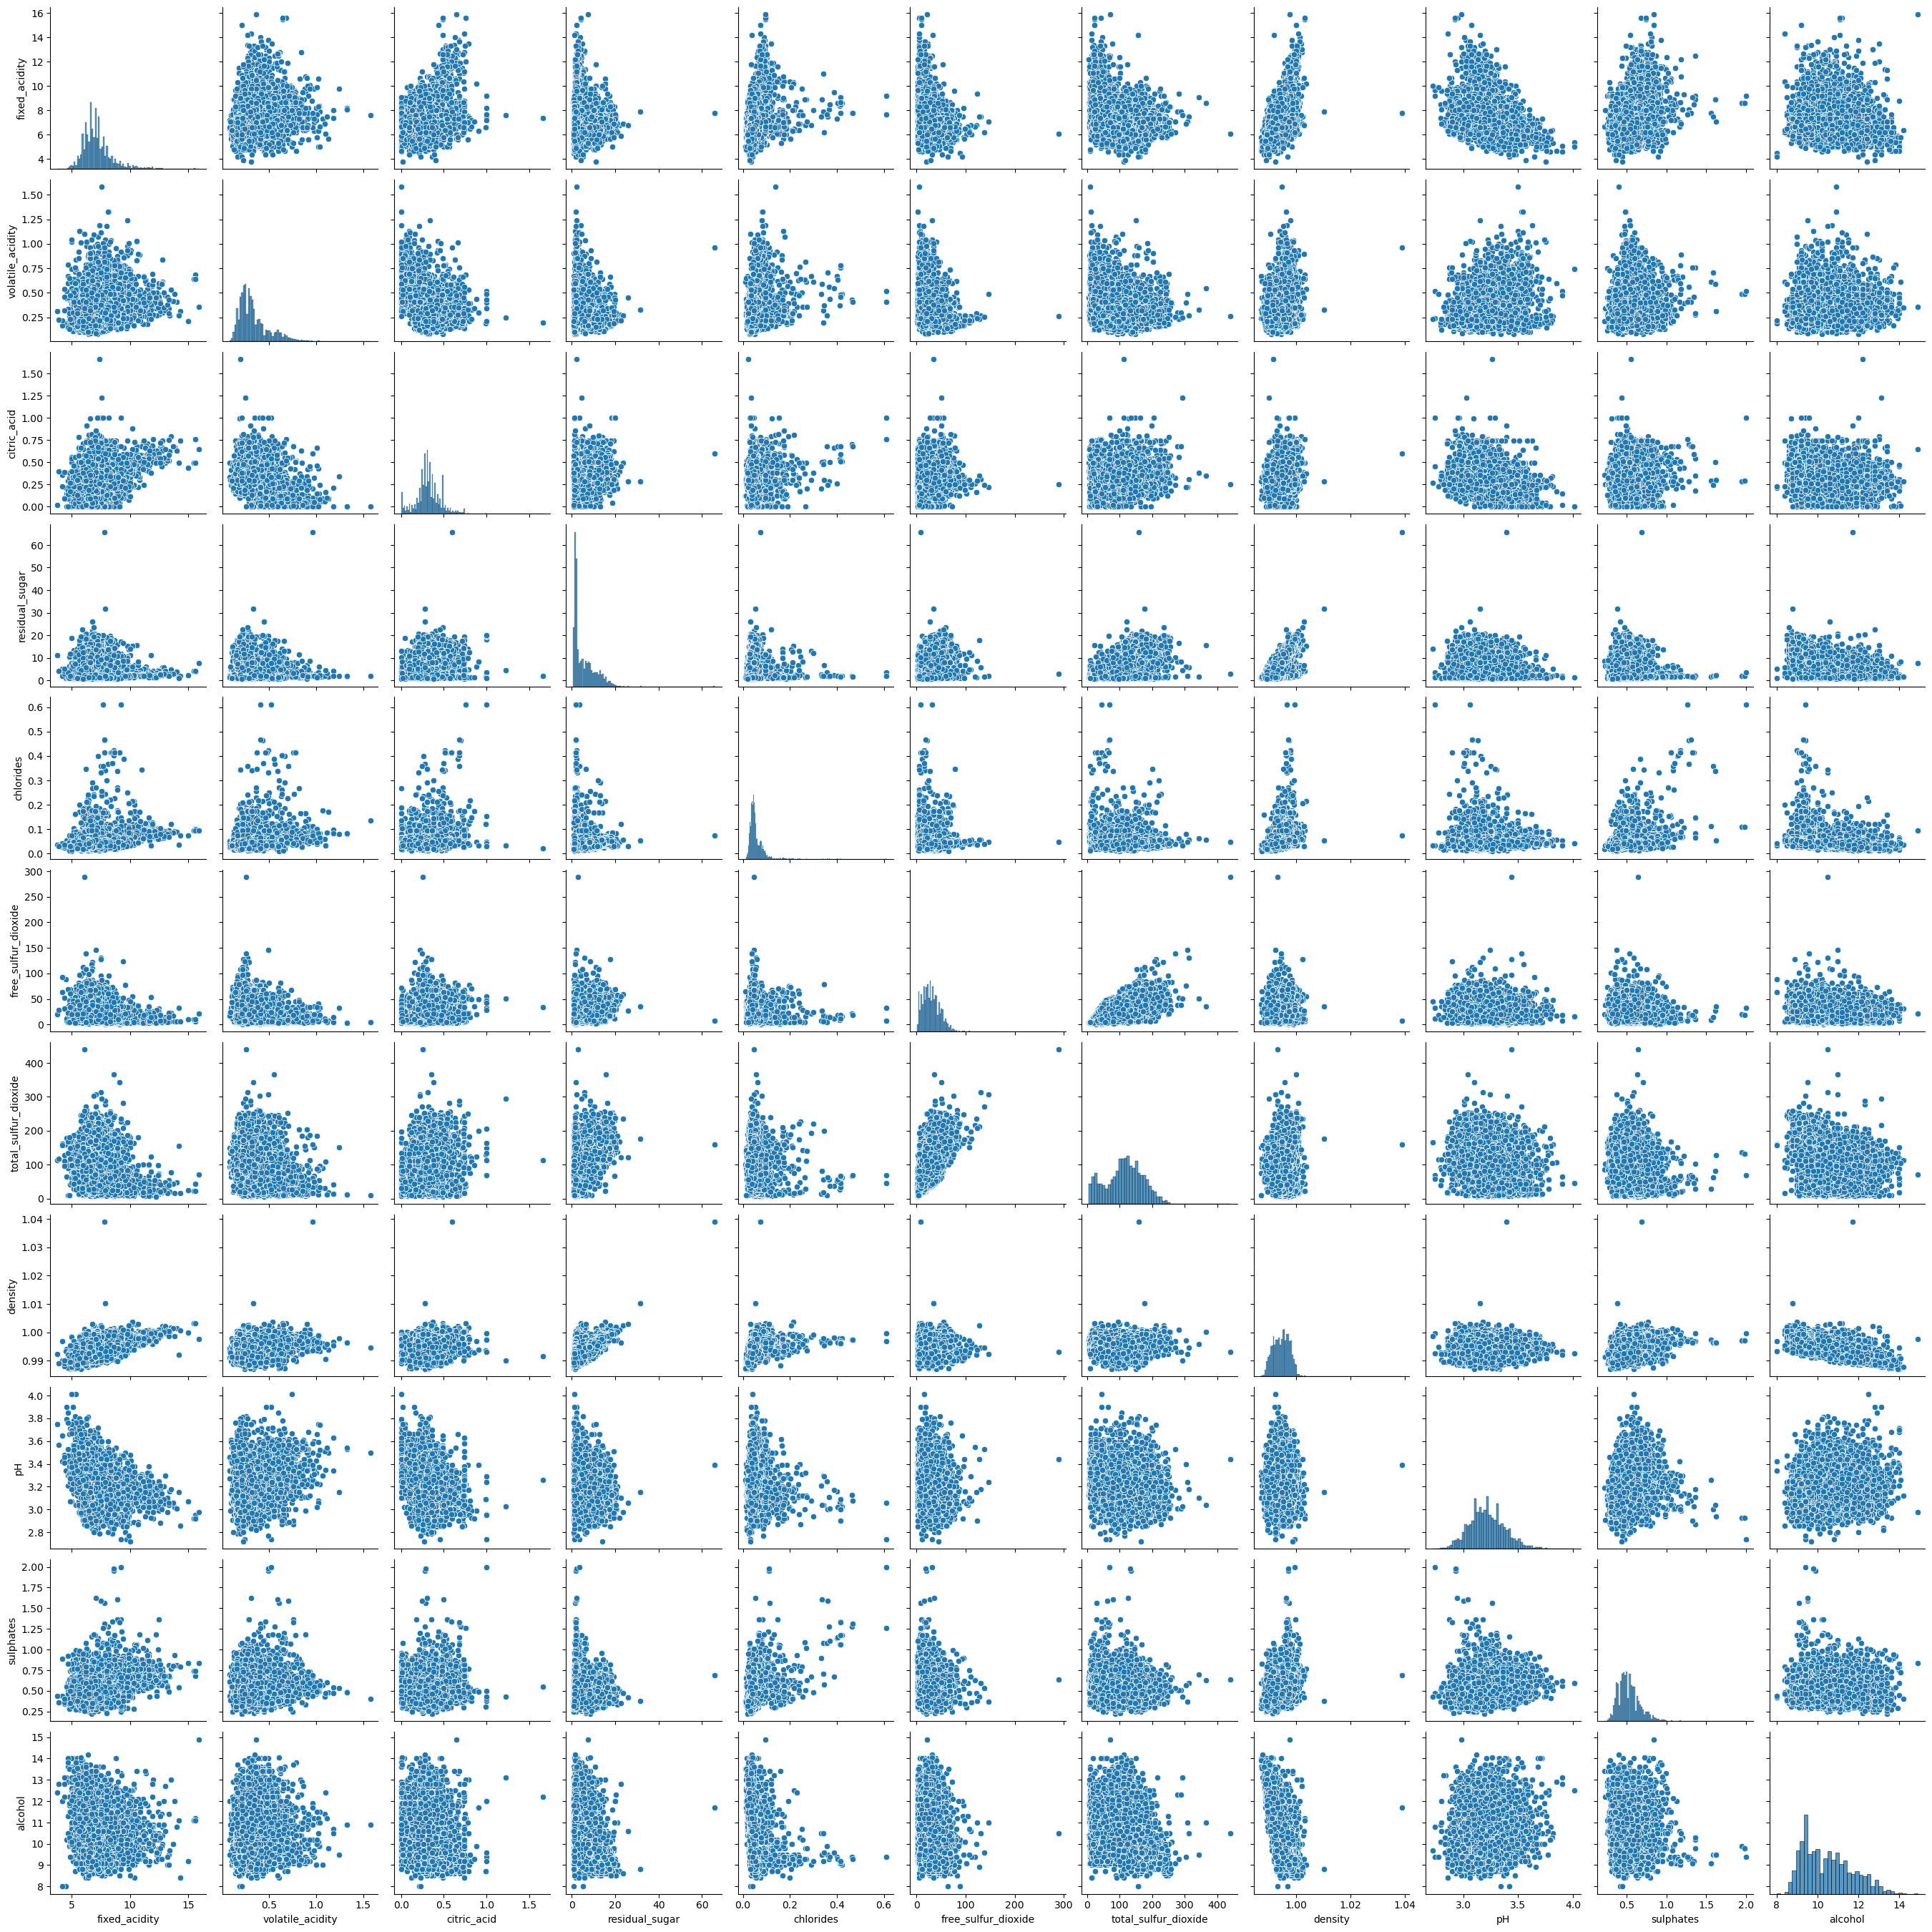

In [22]:
sns.pairplot(data)

/opt/mamba/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/mamba/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/mamba/lib/python3.12/site-packa

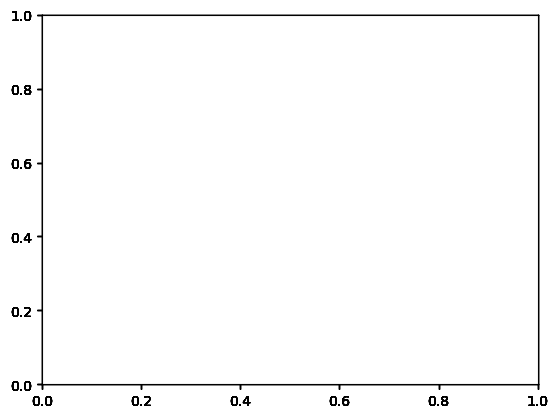

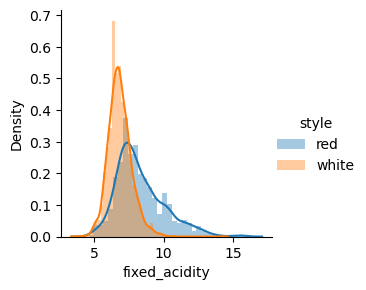

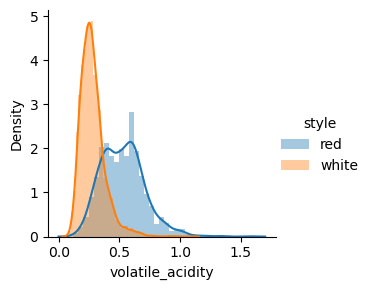

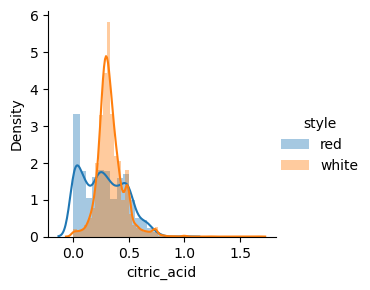

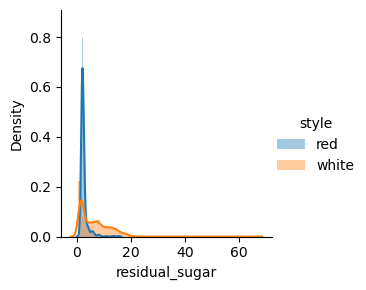

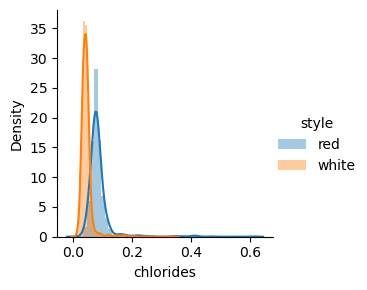

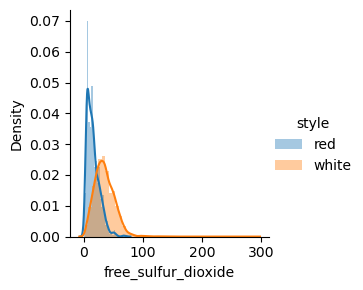

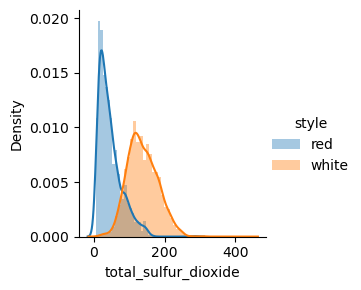

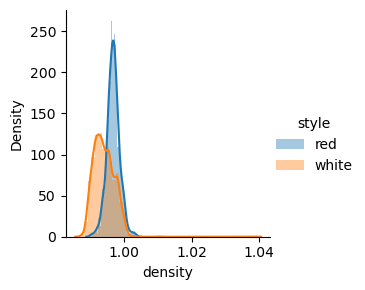

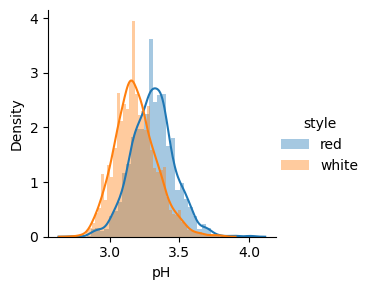

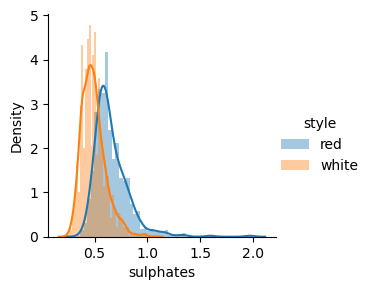

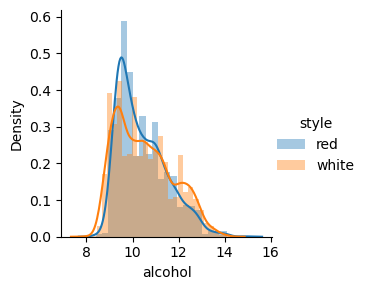

In [21]:
fig = plt.figure()
for i in data.columns[:-1]:
    fig.add_subplot()
    g = sns.FacetGrid(data=data, hue='style')
    g.map(sns.distplot, str(i)).add_legend()

In [26]:
data_reduced = data[['chlorides','total_sulfur_dioxide', 'volatile_acidity', 'density', 'style']]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
data_reduced.drop(columns='style'), data_reduced['style'])

In [29]:
f = LogisticRegression()
f.fit(X_train, y_train)

LogisticRegression()

In [32]:
f.score(X_train,y_train)

0.9573070607553367

In [34]:
f.score(X_test,y_test)

0.9563076923076923

In [37]:
len(X_test)/len(X_train)

0.3335385878489327

Le ratio de la taille fait bien 2/3 1/3, donc on est contents. \
Erreur de test et d'apprentissage à peu près similaires. \
On va dès à présent consulter les matrices de confusion.

In [40]:
confusion_matrix(y_train,f.predict(X_train))

array([[1061,  130],
       [  78, 3603]])

In [41]:
confusion_matrix(y_test, f.predict(X_test))

array([[ 361,   47],
       [  24, 1193]])

In [42]:
g = Perceptron()
g.fit(X_train, y_train)

Perceptron()

In [43]:
g.score(X_train, y_train)

0.930008210180624

In [44]:
g.score(X_test, y_test)

0.9353846153846154

Meilleur score de test que d'entraînement (?)

In [46]:
knn = KNeighborsClassifier()

In [53]:
for i in range(1,5):
    resultat = KNeighborsClassifier(n_neighbors=i)
    resultat.fit(X_train, y_train)
    print('le score pour echantillon d entrainement avec ',i,' voisins est :',resultat.score(X_train, y_train))
    print('le score pour echantillon de test avec ',i,' voisins est :',resultat.score(X_test, y_test))

le score pour echantillon d entrainement avec  1  voisins est : 0.9995894909688013
le score pour echantillon de test avec  1  voisins est : 0.9593846153846154
le score pour echantillon d entrainement avec  2  voisins est : 0.9805008210180624
le score pour echantillon de test avec  2  voisins est : 0.9464615384615385
le score pour echantillon d entrainement avec  3  voisins est : 0.9733169129720853
le score pour echantillon de test avec  3  voisins est : 0.9501538461538461
le score pour echantillon d entrainement avec  4  voisins est : 0.9675697865353038
le score pour echantillon de test avec  4  voisins est : 0.9507692307692308


In [56]:
(data_reduced['style'] == 'white').sum()

4898

In [57]:
(data_reduced['style'] == 'red').sum()

1599

In [61]:
data_red = data_reduced[data_reduced['style'] == 'red']

In [63]:
data_white =  data_reduced[data_reduced['style'] == 'white']

In [64]:
red_resampled = resample(data_red, replace=True, n_samples=812, random_state=12)

In [65]:
white_resampled = resample(data_white, replace=False, n_samples=812, random_state=12)

In [69]:
resampled_data = pd.concat([red_resampled, white_resampled])

On aura un problème parce qu'on met beaucoup plus de poids sur le fait de se tromper sur le rouge. 
Mais on ajoute pas vraiment de données. 
On doit toujours prendre un cluster de points dans un et un autre dans l'autre. On évite d'avoir les mêmes points dans les deux datasets. 
Erreur d'entrainement/test. 
Ca augmente de 3% la perte la question 11.